# importing the required packages

In [1]:
import pandas as pd
import numpy as np
import pandas
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure
import plotly.plotly as py
#import cufflinks as cf


# read the file

In [2]:
hr_data = pd.read_excel('data/HR-Employee-Attrition.xlsx')

In [3]:
hr_data = hr_data.dropna()
print(hr_data.shape)
print(hr_data.columns)


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# predict the Attrition -  y/n 

In [4]:
# data exploration

In [5]:
hr_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:


hr_data['Attrition'] = hr_data['Attrition'].astype('category')

In [7]:
hr_data['y'] = hr_data.Attrition.cat.codes

In [8]:


hr_data['y'].value_counts()

0    1233
1     237
Name: y, dtype: int64

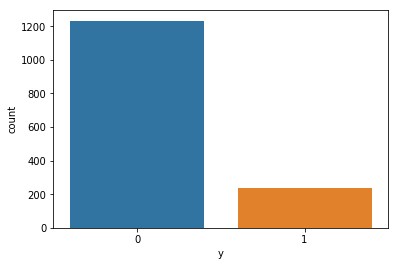

In [9]:
sns.countplot(x='y',data=hr_data);
plt.show()

In [10]:


hr_data.groupby('y').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
y,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [11]:
hr_data = hr_data.drop('Attrition',axis=1)

In [12]:
hr_data.shape

(1470, 35)

###  the average age of customers who changed jobs are less than those who didn't

In [13]:
np.arange(hr_data.shape[0])

array([   0,    1,    2, ..., 1467, 1468, 1469])

In [14]:
hr_data.iloc[1,1]

'Travel_Frequently'

In [15]:
pandas.set_option('display.max_columns',None) # set the option to display all the columns of a dataframe....

In [16]:
hr_data.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [17]:
hr_data.groupby('BusinessTravel').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.620000,816.960000,9.760000,2.926667,1.0,1064.626667,2.733333,64.866667,2.633333,2.040000,2.793333,6261.946667,14635.600000,2.713333,15.606667,3.173333,2.780000,80.0,0.866667,10.593333,2.720000,2.773333,7.146667,4.353333,2.386667,4.300000,0.080000
Travel_Frequently,36.454874,792.628159,9.277978,2.895307,1.0,1014.898917,2.693141,65.097473,2.736462,2.014440,2.790614,6193.725632,14318.187726,2.487365,15.158845,3.166065,2.776173,80.0,0.765343,11.083032,2.815884,2.776173,7.173285,4.241877,2.342960,4.216606,0.249097
Travel_Rarely,37.092042,803.022052,9.088207,2.915628,1.0,1021.793864,2.727709,66.249281,2.742090,2.080537,2.702780,6619.707574,14265.372963,2.744966,15.165868,3.147651,2.685523,80.0,0.790988,11.430489,2.806328,2.755513,6.944391,4.208054,2.117929,4.072867,0.149569


In [18]:
hr_data.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,2.603175,6654.507937,13492.984127,2.936508,14.761905,3.142857,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667,0.190476
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287,0.138398
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,2.751121,6959.172646,14489.793722,2.571749,15.096413,3.136771,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300,0.206278


In [19]:
hr_data.groupby(['Education','EducationField']).mean()

Age   DailyRate  DistanceFromHome  \
Education EducationField                                              
1         Human Resources   30.000000  726.500000         12.000000   
          Life Sciences     33.985075  867.985075          9.223881   
          Marketing         33.071429  569.285714          7.000000   
          Medical           32.365079  867.301587          9.444444   
          Other             25.800000  664.600000          9.000000   
          Technical Degree  26.315789  751.052632          5.578947   
2         Human Resources   33.500000  952.000000          3.000000   
          Life Sciences     36.206897  781.827586          8.758621   
          Marketing         38.125000  760.875000         11.000000   
          Medical           37.000000  859.959596          9.020202   
          Other             33.842105  865.526316          9.736842   
          Technical Degree  41.227273  881.500000         10.545455   
3         Human Resources   35.500000  636.437500          8.812500   
          Life Sciences     36.656652  778.618026          8.648069   
          Marketing         38.016949  750.101695         10.203390   
          Medical           36.251366  790.213115          9.595628   
          Other             34.250000  766.458333          9.250000   
          Technical Degree  36.105263  847.877193          9.666667   
4         Human Resources   46.000000  746.200000         10.800000   
          Life Sciences     39.450867  822.173410          9.231214   
          Marketing         38.384615  717.711538         10.461538   
          Medical           39.644231  823.663462          8.942308   
          Other             38.696970  799.181818          8.212121   
          Technical Degree  38.161290  896.451613          7.870968   
5         Human Resources   37.500000  480.500000          9.500000   
          Life Sciences     37.882353  881.235294         10.647059   
          Marketing         41.300000  791.800000          9.900000   
          Medical           42.266667  782.200000         11.066667   
          Other             29.000000  738.000000          9.000000   
          Technical Degree  40.000000  459.666667         10.000000   

                            EmployeeCount  EmployeeNumber  \
Education EducationField                                    
1         Human Resources             1.0     1802.000000   
          Life Sciences               1.0      983.910448   
          Marketing                   1.0      995.500000   
          Medical                     1.0     1003.730159   
          Other                       1.0     1351.800000   
          Technical Degree            1.0      683.157895   
2         Human Resources             1.0      878.500000   
          Life Sciences               1.0     1032.784483   
          Marketing                   1.0      929.291667   
          Medical                     1.0      925.707071   
          Other                       1.0     1115.421053   
          Technical Degree            1.0      963.045455   
3         Human Resources             1.0     1155.312500   
          Life Sciences               1.0     1040.381974   
          Marketing                   1.0      956.271186   
          Medical                     1.0     1047.699454   
          Other                       1.0      963.666667   
          Technical Degree            1.0     1078.157895   
4         Human Resources             1.0      908.000000   
          Life Sciences               1.0     1032.618497   
          Marketing                   1.0     1062.653846   
          Medical                     1.0     1034.836538   
          Other                       1.0     1049.151515   
          Technical Degree            1.0     1252.645161   
5         Human Resources             1.0     1742.000000   
          Life Sciences               1.0      825.058824   
          Marketing                   1.0     1105.50

In [20]:
hr_data.groupby('Gender').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,37.329932,808.273810,9.210884,2.933673,1.0,1008.239796,2.721088,65.903061,2.714286,2.117347,2.683673,6686.566327,14674.600340,2.812925,15.197279,3.159864,2.681973,80.0,0.780612,11.726190,2.860544,2.763605,7.231293,4.413265,2.294218,4.256803,0.147959
Male,36.653061,798.626984,9.180272,2.899093,1.0,1035.948980,2.722222,65.883220,2.740363,2.028345,2.758503,6380.507937,14072.105442,2.613379,15.217687,3.149660,2.732426,80.0,0.802721,10.981859,2.758503,2.759637,6.859410,4.106576,2.116780,4.034014,0.170068


In [21]:
hr_data.groupby('JobRole').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
JobRole,,,,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,39.809160,854.251908,9.786260,2.992366,1.0,1074.786260,2.770992,66.839695,2.732824,2.473282,2.786260,7528.763359,14400.198473,2.908397,15.450382,3.152672,2.694656,80.0,0.832061,14.068702,2.748092,2.702290,8.374046,4.862595,2.969466,4.572519,0.068702
Human Resources,35.500000,757.923077,8.173077,2.884615,1.0,1236.326923,2.596154,64.173077,2.711538,1.480769,2.557692,4235.750000,13292.403846,2.961538,14.807692,3.134615,2.961538,80.0,0.750000,8.173077,2.557692,2.923077,5.326923,3.134615,1.269231,3.173077,0.230769
Laboratory Technician,34.096525,796.617761,9.409266,2.772201,1.0,999.200772,2.718147,66.683398,2.694981,1.239382,2.691120,3237.169884,14066.061776,2.579151,15.046332,3.162162,2.687259,80.0,0.818533,7.656371,2.949807,2.718147,5.019305,3.200772,1.420849,3.297297,0.239382
Manager,46.764706,782.950980,8.029412,3.019608,1.0,947.598039,2.764706,66.833333,2.774510,4.303922,2.705882,17181.676471,15139.578431,3.078431,15.137255,3.196078,2.813725,80.0,0.745098,24.549020,2.813725,2.774510,14.431373,6.450980,4.833333,6.274510,0.049020
Manufacturing Director,38.296552,796.020690,9.482759,2.896552,1.0,998.758621,2.917241,65.006897,2.682759,2.448276,2.682759,7295.137931,14478.965517,2.765517,15.593103,3.186207,2.724138,80.0,0.813793,12.786207,2.744828,2.765517,7.600000,4.972414,2.117241,4.944828,0.068966
Research Director,44.000000,802.450000,8.437500,3.125000,1.0,989.787500,2.500000,63.762500,2.775000,3.975000,2.700000,16033.550000,15080.550000,3.712500,14.950000,3.100000,2.687500,80.0,0.850000,21.400000,2.775000,2.862500,10.937500,6.287500,3.187500,6.075000,0.025000
Research Scientist,34.236301,800.359589,9.013699,2.914384,1.0,1003.486301,2.726027,66.708904,2.797945,1.202055,2.773973,3239.972603,13927.113014,2.472603,15.448630,3.167808,2.705479,80.0,0.773973,7.715753,2.664384,2.678082,5.113014,3.273973,1.506849,3.208904,0.160959
Sales Executive,36.889571,802.098160,9.659509,3.015337,1.0,1051.092025,2.671779,65.438650,2.714724,2.328221,2.754601,6924.279141,14471.110429,2.720859,14.889571,3.125767,2.702454,80.0,0.819018,11.101227,2.831288,2.803681,7.496933,4.855828,2.484663,4.677914,0.174847
Sales Representative,30.361446,811.349398,8.662651,2.530120,1.0,1040.253012,2.734940,64.337349,2.650602,1.084337,2.734940,2626.000000,14278.204819,1.626506,15.674699,3.144578,2.602410,80.0,0.626506,4.674699,3.012048,2.891566,2.915663,2.012048,1.060241,1.662651,0.397590


In [22]:
hr_data.groupby('MaritalStatus').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
MaritalStatus,,,,,,,,,,,,,,,,,,,,,,,,,,,
Divorced,37.489297,830.449541,9.110092,2.908257,1.0,996.568807,2.755352,65.657492,2.752294,2.140673,2.697248,6786.287462,14310.085627,2.883792,15.048930,3.146789,2.724771,80.0,1.504587,11.807339,2.819572,2.749235,7.302752,4.35474,2.155963,4.217125,0.100917
Married,37.757801,820.059435,9.459138,2.910847,1.0,1060.187221,2.695394,66.696880,2.751857,2.124814,2.716196,6793.671620,14044.502229,2.649331,15.292719,3.157504,2.661218,80.0,1.002972,11.732541,2.757801,2.756315,7.307578,4.48737,2.377415,4.251114,0.124814
Single,35.336170,757.865957,8.868085,2.919149,1.0,993.974468,2.736170,64.900000,2.682979,1.923404,2.768085,5889.472340,14699.817021,2.623404,15.202128,3.153191,2.776596,80.0,0.000000,10.263830,2.844681,2.776596,6.374468,3.77234,1.938298,3.874468,0.255319


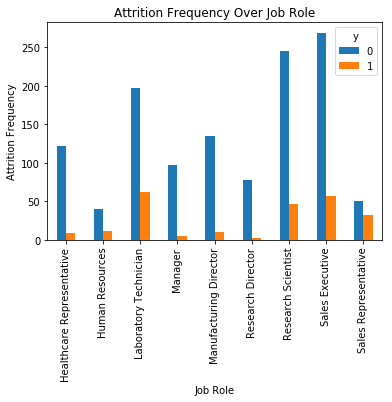

In [23]:
pd.crosstab(hr_data.JobRole,hr_data.y).plot(kind='bar');
plt.title("Attrition Frequency Over Job Role");
plt.xlabel("Job Role");
plt.ylabel("Attrition Frequency");

In [24]:
# applyinf the descritpion to cat columns - Education, EnvironmentSatisfaction,JobInvolvement , 
#JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalancei

In [25]:
hr_desc = hr_data.copy()

In [26]:
hr_desc.shape

(1470, 35)

In [27]:
print(hr_desc.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'y'],
      dtype='object')


In [28]:
Education_desc = {1 : 'Below College', 2 : 'College' , 3 : 'Bachelor' , 4 : 'Master' , 5 : 'Doctor'}

In [29]:
hr_desc['Education'].replace(Education_desc,inplace=True)

In [30]:
hr_desc.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [31]:
#hr_desc.Education[hr_desc['Education']=='Below college'] = 'Below College'

In [32]:
EnvironmentSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' , 4 : 'Very High'}
JobInvolvement_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
JobSatisfaction_desc = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
PerformanceRating_desc = {1 :'Low' , 2 : 'Good' , 3 : 'Excellent' , 4 : 'Outstanding'}
RelationshipSatisfaction_desc  = {1 : 'Low' , 2 : 'Medium' , 3 : 'High' ,4 : 'Very High'}
WorkLifeBalance_desc = {1 : 'Bad' , 2 : 'Good' , 3 : 'Better' ,4 : 'Best'}


In [33]:
hr_desc['EnvironmentSatisfaction'] = hr_desc['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_desc)
hr_desc['JobInvolvement'] = hr_desc['JobInvolvement'].map(JobInvolvement_desc)
hr_desc['JobSatisfaction'] = hr_desc['JobSatisfaction'].map(JobSatisfaction_desc)
hr_desc['PerformanceRating'] = hr_desc['PerformanceRating'].map(PerformanceRating_desc)
hr_desc['RelationshipSatisfaction'] = hr_desc['RelationshipSatisfaction'].map(RelationshipSatisfaction_desc)
hr_desc['WorkLifeBalance'] = hr_desc['WorkLifeBalance'].map(WorkLifeBalance_desc)

In [34]:
hr_desc.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,y
0,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2,0


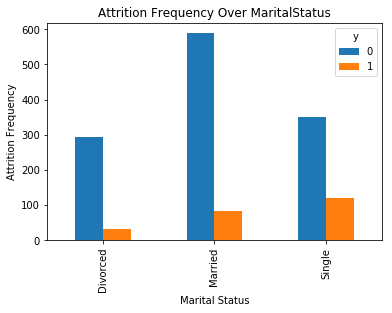

In [35]:
pd.crosstab(hr_desc.MaritalStatus,hr_desc.y).plot(kind='bar');
plt.title("Attrition Frequency Over MaritalStatus");
plt.xlabel('Marital Status');
plt.ylabel('Attrition Frequency');

### single people tend to change jobs frequently

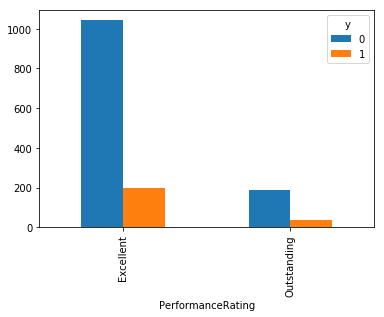

In [36]:
pd.crosstab(hr_desc.PerformanceRating, hr_desc.y).plot(kind='bar');

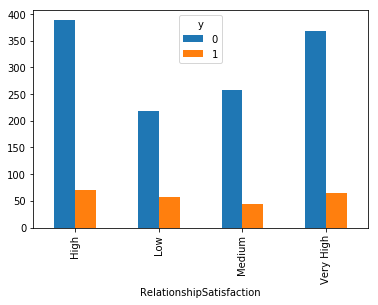

In [37]:
pd.crosstab(hr_desc.RelationshipSatisfaction , hr_desc.y).plot(kind='bar');

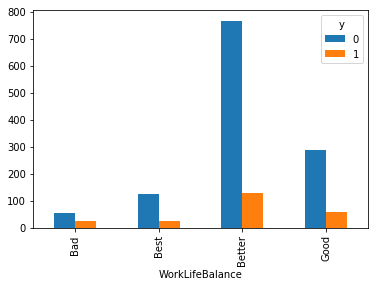

In [38]:
pd.crosstab(hr_desc.WorkLifeBalance, hr_desc.y).plot(kind='bar');

In [39]:
hr_desc.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [41]:
### dropping columns
hr_desc = hr_desc.drop(['Over18'],axis=1)
#hr_desc = hr_desc.drop('Attrition',axis=1)

In [42]:
# creating a list of categorical variables
cat_var = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','JobInvolvement','Gender','JobRole','JobSatisfaction',
'MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

In [43]:
# converted the cat columns from object dtype to category dtype
for var in cat_var:
    hr_desc[var] = hr_desc[var].astype('category')

In [44]:
# creating dummies for cat columns   
for var in cat_var:
    cat_list = 'var' + '_' +var
    cat_list = pd.get_dummies(hr_desc[var],prefix=var)
    hr1 =hr_desc.join(cat_list)
    hr_desc = hr1

In [45]:
hr_desc.info() # 89 columns wooooh....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 89 columns):
Age                                   1470 non-null int64
BusinessTravel                        1470 non-null category
DailyRate                             1470 non-null int64
Department                            1470 non-null category
DistanceFromHome                      1470 non-null int64
Education                             1470 non-null category
EducationField                        1470 non-null category
EmployeeCount                         1470 non-null int64
EmployeeNumber                        1470 non-null int64
EnvironmentSatisfaction               1470 non-null category
Gender                                1470 non-null category
HourlyRate                            1470 non-null int64
JobInvolvement                        1470 non-null category
JobLevel                              1470 non-null int64
JobRole                               1470 non-null category

In [46]:
# creating a list of variables
hr_vars=hr_desc.columns.values.tolist()

to_keep=[i for i in hr_vars if i not in cat_var]

In [47]:
len(hr_vars)

89

In [48]:
len(to_keep)

75

In [49]:
hr_final = hr_desc[to_keep]

In [50]:
hr_final.columns # final columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'y',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Bachelor', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_High', 'EnvironmentSatisfaction_Low',
    

In [51]:
"""data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y] """

"data_final_vars=data_final.columns.values.tolist()\ny=['y']\nX=[i for i in data_final_vars if i not in y] "

In [52]:
hr_final_vars = hr_final.columns.values.tolist() # creating a list of final variables

In [53]:
y = ['y']

In [54]:
X = [i for i in hr_final_vars if i not in y] # excluding the target variable

In [55]:
X

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'Education_Bachelor',
 'Education_Below College',
 'Education_College',
 'Education_Doctor',
 'Education_Master',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction_High',
 'EnvironmentSatisfaction_Low',
 'EnvironmentSatisfaction_Medium',
 'EnvironmentSatisfaction_Very High',
 'J

# Feature Selection
### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and 
### choose either the best or worst performing feature, setting the feature aside and then repeating 
### the process with the rest of the features. This process is applied until all features in the dataset are exhausted. 
### The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [56]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [57]:
logreg = LogisticRegression()

In [58]:
rfe = RFE(logreg)

In [59]:
rfe = rfe.fit(hr_final[X] , hr_final[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Suhasini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[False False False False False False False False False False False False
  True False  True False False False False  True  True False False  True
 False  True False False  True False  True  True False  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True False False  True False  True False  True  True
  True  True  True  True False False False  True False False  True False
  True False]
[24 34 19 35 36 33 14 37 38 11 28 30  1 13  1 15  6  4  3  1  1 20 31  1  2
  1 29 23  1 21  1  1 12  1  1  1  1  1  1  1  1  1 22  1  1  5  1  1  1  1
  1  1 10 32  1 27  1 25  1  1  1  1  1  1 16 26  9  1  8  7  1 18  1 17]


In [60]:
print(rfe.estimator_)
print(rfe.n_features_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
37


In [61]:
rfe.get_params(deep=True)

{'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'ovr',
 'estimator__n_jobs': 1,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_features_to_select': None,
 'step': 1,
 'verbose': 0}

In [62]:
### find the columns which has high ranking.... 
cols = hr_final.loc[:,rfe.support_].columns.tolist()

In [63]:
#cols.remove('y')

In [64]:
X = hr_final[cols]
y = hr_final['y']

In [65]:
### implementing the stats model


In [66]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result =logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.333015
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1435
Method:                           MLE   Df Model:                           34
Date:                Thu, 05 Jul 2018   Pseudo R-squ.:                  0.2461
Time:                        21:10:14   Log-Likelihood:                -489.53
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 3.961e-48
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
StockOptionLevel                      -0.1625      0.144   

C:\Users\Suhasini\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

C:\Users\Suhasini\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Suhasini\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning:

invalid value encountered in less_equal



In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

C:\Users\Suhasini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# predicting on the test set

In [69]:
y_pred = logreg.predict(X_test)
print('accuracy of logistic reg classifier on test set : {:.2f}'.format(logreg.score(X_test,y_test)))

accuracy of logistic reg classifier on test set : 0.87


# cross validation

In [70]:
len(y_test)

441

In [71]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [72]:
kFold = model_selection.KFold(n_splits=10,random_state=10)

In [73]:
modelcv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelcv, X_train, y_train , cv =kFold, scoring=scoring)
print("10 fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10 fold cross validation average accuracy: 0.854
[ 0.86407767  0.85436893  0.87378641  0.87378641  0.81553398  0.86407767
  0.88349515  0.81553398  0.78640777  0.91176471]


In [74]:
# The average accuracy remains close to Logistic Reg Model accuracy...so we can conclude that model generalizes well...

In [75]:
# confusion matrix

In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[363   8]
 [ 50  20]]


In [77]:
print("Accuracy of Confusion MAtrix:" , 383/(383+58))

Accuracy of Confusion MAtrix: 0.8684807256235828


In [78]:
# correct prediction = 363+20 = 383 , incorrect predictions = 50+8 = 58

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       371
          1       0.71      0.29      0.41        70

avg / total       0.85      0.87      0.84       441



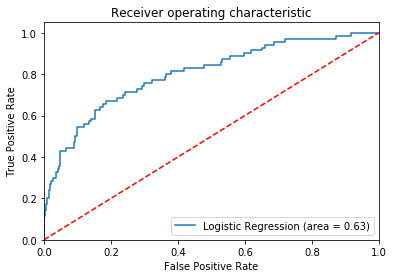

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [81]:
## decision tree modelling

In [82]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [83]:
len(X)

1470

In [84]:
len(y)

1470

In [85]:
dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=0)
dt.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [87]:
# predicting on test set

In [88]:
y_pred = dt.predict(X_test)
print('accuracy of decision tree classifier on test set : {:.2f}'.format(dt.score(X_test,y_test)))

accuracy of decision tree classifier on test set : 0.83


In [89]:
# cross validation score 

In [90]:
#modelcv = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(dt, X_train, y_train , cv =kFold, scoring=scoring)
print("10 fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10 fold cross validation average accuracy: 0.833
[ 0.85436893  0.81553398  0.85436893  0.87378641  0.83495146  0.83495146
  0.83495146  0.81553398  0.80582524  0.80392157]


In [91]:
# The average accuracy remains close to decision tree Model accuracy...so we can conclude that model generalizes well..

In [92]:
# confusion matrix

In [93]:

con_mat = confusion_matrix(y_test,y_pred)

In [94]:
print(con_mat)

[[345  26]
 [ 50  20]]


In [95]:
print("the accuracy of the confusion matrix is" ,  365/(365+76))

the accuracy of the confusion matrix is 0.8276643990929705


In [96]:
print("classification report" , classification_report(y_test,y_pred))

classification report              precision    recall  f1-score   support

          0       0.87      0.93      0.90       371
          1       0.43      0.29      0.34        70

avg / total       0.80      0.83      0.81       441



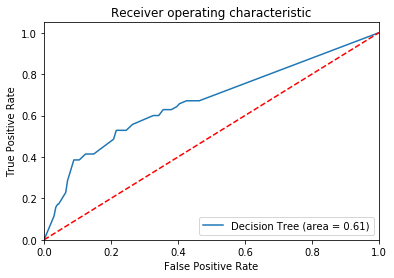

In [97]:
logit_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [98]:
'''features = list(X.columns[:4])
print("* features:", features, sep="\n")'''

'features = list(X.columns[:4])\nprint("* features:", features, sep="\n")'

In [99]:
tree.export_graphviz(dt,out_file='tree.dot')

In [100]:
print(dt.feature_importances_)

[ 0.07198388  0.07113095  0.00298174  0.          0.01265147  0.04128275
  0.01425623  0.01887024  0.03304193  0.00937007  0.00264728  0.05811024
  0.0334657   0.05957566  0.00867865  0.00865275  0.01665971  0.
  0.01045218  0.          0.00622557  0.00668315  0.04677684  0.01743986
  0.0637019   0.02170293  0.02219752  0.          0.01051103  0.00157146
  0.          0.09770982  0.14054881  0.03349458  0.05762512  0.        ]


In [101]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [102]:
dot_data = StringIO()

In [103]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [104]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
#Image(graph.create_png())